In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os

def matrixPlotRuns (accuracy, precision, recall, f1scores, path, name):
    if not os.path.exists(path):
        os.makedirs(path)
        
    #accuracy = np.array([10, 50 ,40])
    #precision = np.array([50, 40, 30])

    acc_mean = np.mean(accuracy)
    prec_mean = np.mean(precision)
    rec_mean = np.mean(recall)
    f1_mean = np.mean(f1scores)

    acc_std = np.std(accuracy)
    prec_std = np.std(precision)
    rec_std = np.std(recall)
    f1_std = np.std(f1scores)

    labels = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
    x_pos = np.arange(len(labels))
    #CTEs = [tp_mean, fp_mean, fn_mean, tn_mean]
    #error = [tp_std, fp_std, fn_std, tn_std]
    CTEs = [acc_mean, prec_mean, rec_mean, f1_mean]
    error = [acc_std, prec_std, rec_std, f1_std]


    fig, ax = plt.subplots()
    #ax.bar(x_pos, CTEs, yerr=error, align='center', alpha=0.5, ecolor='black', capsize=10)
    ax.bar(x_pos, CTEs, yerr=error, align='center', alpha=0.5, ecolor='black', capsize=10)
    ax.set_ylabel('Value of Score')
    ax.set_xticks(x_pos)
    ax.set_xticklabels(labels)
    ax.set_title('Average values in set of ' + str(len(accuracy)) + ' runs: ' + name) # len(accuracy) also returns the amount of runs
    ax.yaxis.grid(True)
    plt.ylim(0, 1)
    plt.yticks(np.arange(0, 1.1, 0.1))


    # Save the figure
    plt.tight_layout()
    plt.savefig(path + '\\scoresAvg')
    #plt.show()

In [23]:
import matplotlib.pyplot as plt
import numpy as np
import os

def matrixPlotValues (tp, fp, fn, tn, path, runName, runLength):
    if not os.path.exists(path):
        os.makedirs(path)
    #tp = np.array([10, 50 ,40])
    #fp = np.array([50, 40, 30])
    #fn = np.array([80, 90, 60])
    #tn = np.array([80, 90, 60])

    tp_mean = np.mean(tp)
    fp_mean = np.mean(fp)
    fn_mean = np.mean(fn)
    tn_mean = np.mean(tn)

    tp_std = np.std(tp)
    fp_std = np.std(fp)
    fn_std = np.std(fn)
    tn_std = np.std(tn)

    highestMean = max(tp_mean, fp_mean, fn_mean, tn_mean)
    highestMean = highestMean + 5 # done so that if highest is for example 44.3, it doesnt round to 40 but to 50 instead
    yLimit = round(highestMean, -1)

    labels = ['True Positive (' + str(tp_mean) + ')', 'False Negative (' + str(fn_mean) + ')','False Positive (' + str(fp_mean) + ')', 'True Negative (' + str(tn_mean) + ')']
    x_pos = np.arange(len(labels))
    CTEs = [tp_mean, fn_mean, fp_mean, tn_mean]
    error = [tp_std, fn_std, fp_std, tn_std]

    fig, ax = plt.subplots()
    ax.bar(x_pos, CTEs, yerr=error, align='center', alpha=0.5, ecolor='black', capsize=10)
    ax.set_ylabel('Amount of Evaluations')
    ax.set_xticks(x_pos)
    ax.set_xticklabels(labels)
    for item in ([ax.title, ax.xaxis.label] +
             ax.get_xticklabels()):
        item.set_fontsize(9)
    ax.set_title('Confusion Matrix scores for run set ' + runName)
    ax.yaxis.grid(True)
    plt.ylim(0, yLimit)

    # Save the figure
    plt.tight_layout()
    plt.savefig(path + '\\scoreMatrix')
    #plt.show()

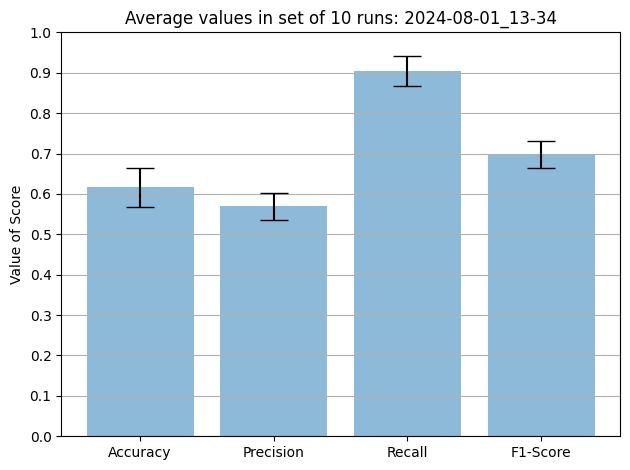

In [25]:
# average values
import pandas as pd

scoreTable = pd.read_excel("results\\binary\\default\\tweet_eval_irony_train\\100\\gpt-3.5-turbo\\2024-08-01_13-34\\scores.xlsx")
scoreTable

matrixPlotRuns(scoreTable['Accuracy'].values, scoreTable['Precision'].values, scoreTable['Recall'].values, scoreTable['F1'].values, "results\\binary\\default\\tweet_eval_irony_train\\100\\gpt-3.5-turbo\\2024-08-01_13-34", "2024-08-01_13-34")

#scoreTable['Accuracy'].values

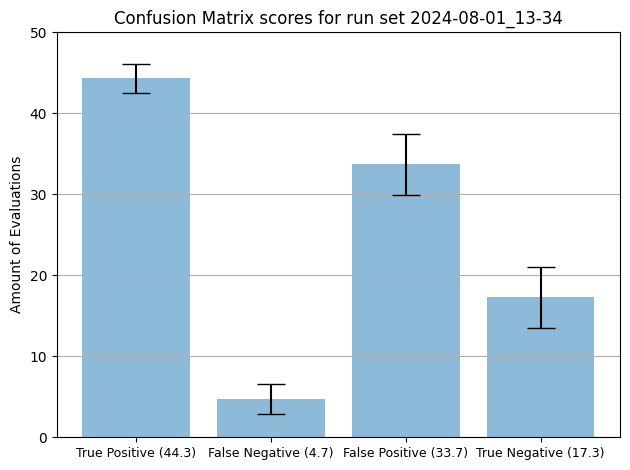

In [24]:
# average confusion matrix
import pandas as pd

scoreTable = pd.read_excel("results\\binary\\default\\tweet_eval_irony_train\\100\\gpt-3.5-turbo\\2024-08-01_13-34\\scorematrix.xlsx")
scoreTable

matrixPlotValues(scoreTable['tp'].values, scoreTable['fp'].values, scoreTable['fn'].values, scoreTable['tn'].values, "results\\binary\\default\\tweet_eval_irony_train\\100\\gpt-3.5-turbo\\2024-08-01_13-34", "2024-08-01_13-34", 100)

#scoreTable['Accuracy'].values

In [27]:
# SMALL TEST CELL TO TEST DATASETS MANUALLY (pre-gpt)
dataset = pd.read_csv("datasets\\tweet_eval_irony_train.csv")
dataset = dataset.head(100)
notIrony = 0
irony = 0

for index, row in dataset.iterrows():
    if (row[1] == 1):
        irony = irony + 1
    else:
        notIrony = notIrony + 1

print(irony, notIrony)
dataset

49 51


,text,label
0,seeing ppl walking w/ crutches makes me really...,1
1,"look for the girl with the broken smile, ask h...",0
2,Now I remember why I buy books online @user #s...,1
3,@user @user So is he banded from wearing the c...,1
4,Just found out there are Etch A Sketch apps. ...,1
...,...,...
95,Kind of love how I got a voicemail from my sea...,1
96,I feel a nap in my near future. #NapTime,0
97,#AnalScreen #Exotic Exotic brunette gets her l...,0
98,#sundayfunday #mylove #mermaidlove #newyear201...,0


In [4]:
# average confusion matrix
import pandas as pd

path = "results\\binary\\default\\tweet_eval_irony_train\\100\\gpt-3.5-turbo\\2024-08-01_13-34"

resultsTable = pd.read_csv(path + "\\results.csv")

correctConsistentThreshold = 0.7
correctConsistent = []
wrongConsistent = []
correctAbs = []
wrongAbs = []
cci = 0 # consistently correct irony
ccn = 0 # consistently correct non-irony
cii = 0 # consistently incorrect irony
cin = 0 # consistently incorrect non-irony

output = []

for index, row in resultsTable.iterrows():
    numCorrect = 0
    for i in range((len(row) - 2)):
        if(row[i + 2] == row[1]):
            numCorrect = numCorrect + 1
    output.append("Row no. " + str(index + 1) + ": Correct - " + str(numCorrect) + " Wrong - " + str(((len(row) - 2)) - numCorrect) + '\n')
    if ((numCorrect/(len(row) - 2)) >= correctConsistentThreshold):
        correctConsistent.append(i + 2)
        if (row[1] == 1): # if the row is ironic, it was consistently correctly identified as ironic
            cci = cci + 1
        else: # if the row is non-ironic, it was consistently correctly identified as non-ironic
            ccn = ccn + 1
    if ((numCorrect/(len(row) - 2)) <= 1 - correctConsistentThreshold):
        wrongConsistent.append(i + 2)
        if (row[1] == 1): # see above, inconsistently correctly indentifications here
            cii = cii + 1
        else:
            cin = cin + 1
    if (numCorrect == len(row) - 2):
        correctAbs.append(i + 2)
    if (numCorrect == 0):
        wrongAbs.append(i + 2)

output.insert(0, "Consistently correct/wrong using threshold " + str(correctConsistentThreshold) + ": " + str(len(correctConsistent)) + "/" + str(len(wrongConsistent)) + ' - '
               + str(((len(correctConsistent) + len(wrongConsistent))/len(resultsTable)) * 100) + "% of " + str(len(resultsTable)) + " rows are consistent." +  '\n')

output.insert(1, "Absolutely correct/wrong: " + str(len(correctAbs)) + "/" + str(len(wrongAbs)) + ' - ' + str(len(correctAbs)/len(resultsTable)) + '/' + str(len(wrongAbs)/len(resultsTable)) + '\n')

output.insert(2, str(len(resultsTable) - (len(correctConsistent) + len(wrongConsistent)))  + ' rows are contested.' + '\n')

output.insert(3, 'Consistently correct irony/non-irony: ' + str(cci) + '/' + str(ccn) + '\n')

output.insert(4, 'Consistently incorrect irony/non-irony: ' + str(cii) + '/' + str(cin) + '\n')

output

file = open(path + "\\scoreClassificationConsistency.txt", "w")
file.writelines(output)
file.close()